In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [262]:

# library for data processing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold

# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [263]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [264]:
df.shape

(5110, 12)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

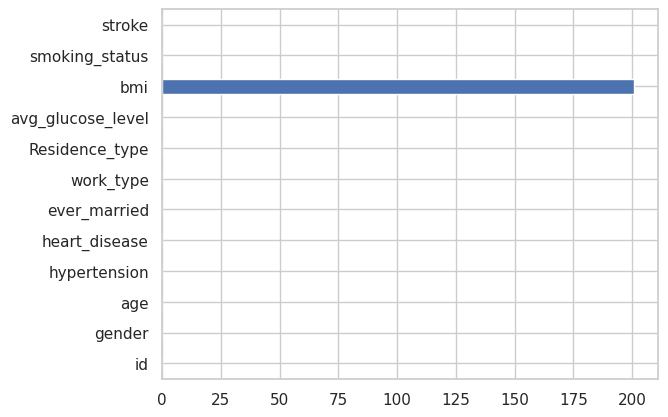

In [265]:

print(df.isna().sum())
df.isna().sum().plot.barh()

Found 201 NULL values in bmi column

Provides basic statistical analysis of all numberical type attributes count, mean, standaard deviation, minimum values, all quartiles, maximum values


In [266]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


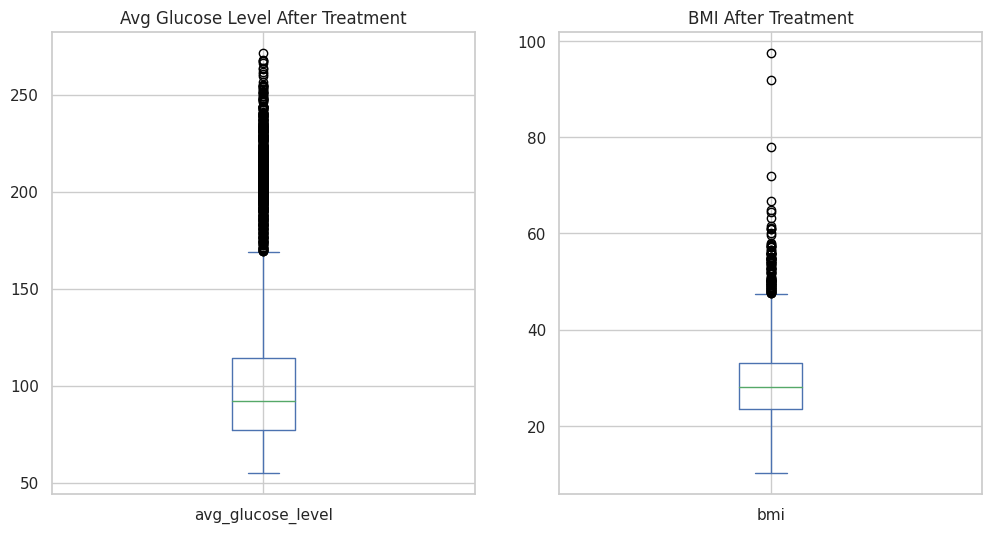

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

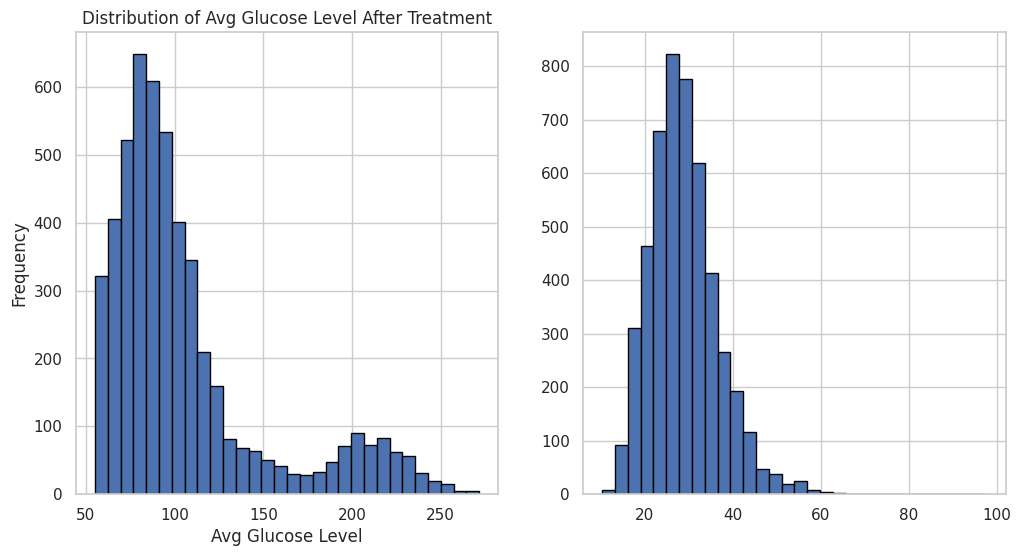

In [267]:
import matplotlib.pyplot as plt

# Box plots to visualize the distributions after outlier treatment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['avg_glucose_level'].plot.box(title='Avg Glucose Level After Treatment')
plt.subplot(1, 2, 2)
df['bmi'].plot.box(title='BMI After Treatment')
plt.show()

# Histograms can also be useful
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['avg_glucose_level'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Avg Glucose Level After Treatment')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['bmi'].hist(bins=30, edgecolor='black')
plt


provides the data type of all attributes, number of not null values

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [269]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

EDA

Pre processing

In [270]:
#filling null values with the mean
df['bmi'].fillna(df['bmi'].mean(), inplace= True)


Handling NULL values analysing the attributes

dropping the ID attribute as it does not provide any statistical insights during data prediction

Reducing a dimension

In [271]:

df = df.drop(['id'],axis=1)

# Analysis


gender analysis

In [272]:

df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


We have a other gender and since there is only 1 instance we will remove it as to reduce the dimension of age

<Axes: ylabel='count'>

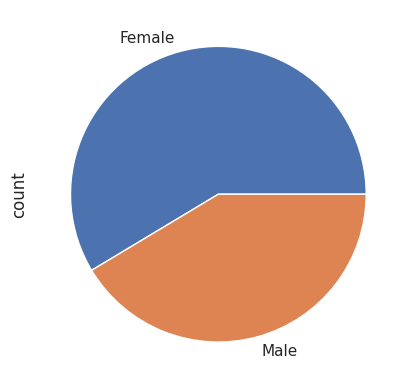

In [273]:
df['gender'] = df['gender'].replace('Other','Female')
df['gender'].value_counts().plot(kind="pie")

stroke analysis

<Axes: xlabel='stroke', ylabel='Count'>

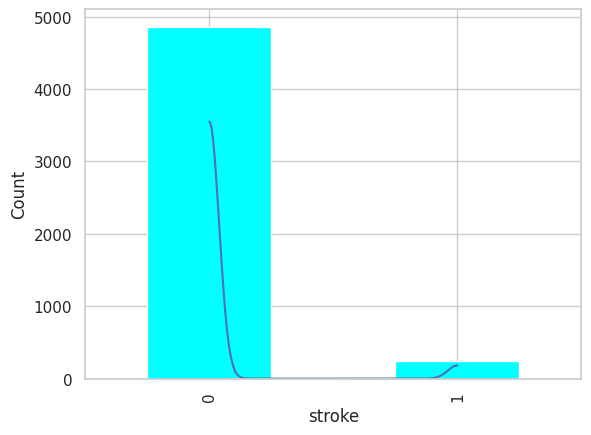

In [274]:
df['stroke'].value_counts()
sns.histplot(df['stroke'],kde = True)
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [275]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)


% of people who actualy got a stroke :  4.9


The dataset is highly skewed . we need to perform transformations to improve samples of minority class

Hyper tension analysis

In [276]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

<Axes: xlabel='hypertension'>

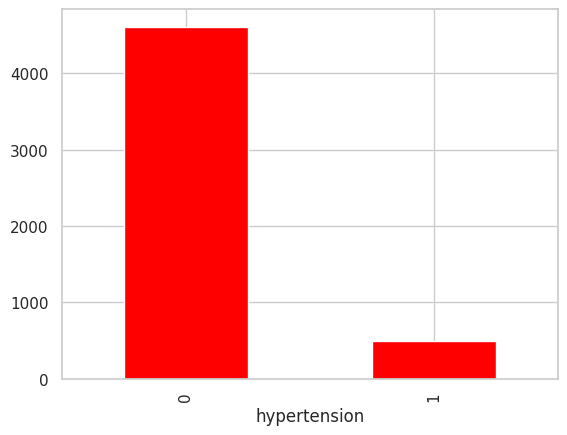

In [277]:

df['hypertension'].value_counts().plot(kind="bar",color = "red")

worktype analysis

In [278]:

df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: xlabel='work_type'>

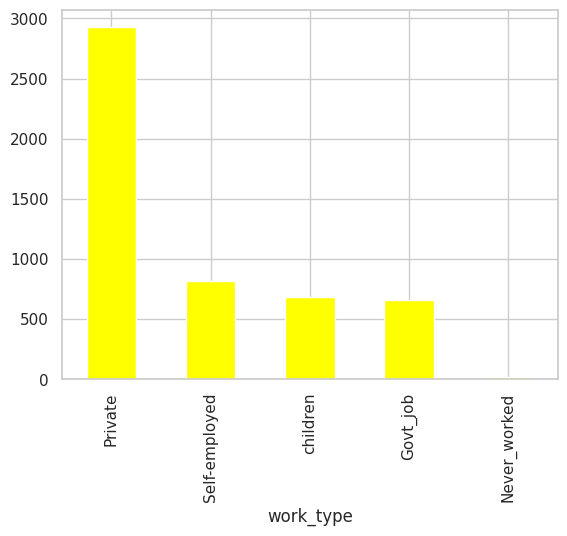

In [279]:
df['work_type'].value_counts().plot(kind="bar",color = "yellow")


Smoking status analysis

In [280]:

df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: xlabel='smoking_status'>

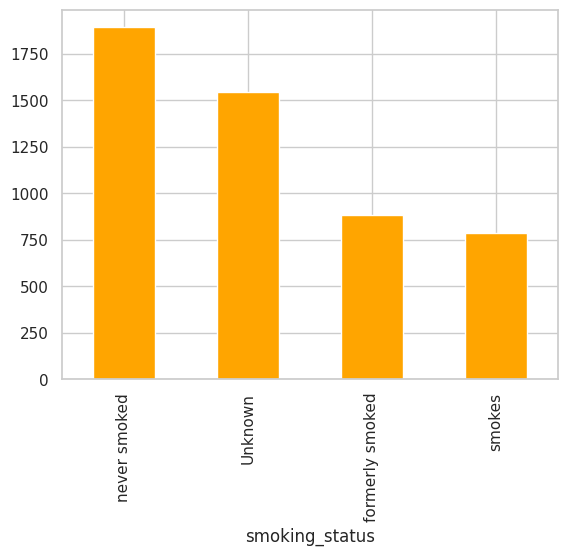

In [281]:
df['smoking_status'].value_counts().plot(kind="bar",color = "orange")


Residence type

In [282]:
df['Residence_type'].value_counts()


Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: xlabel='Residence_type'>

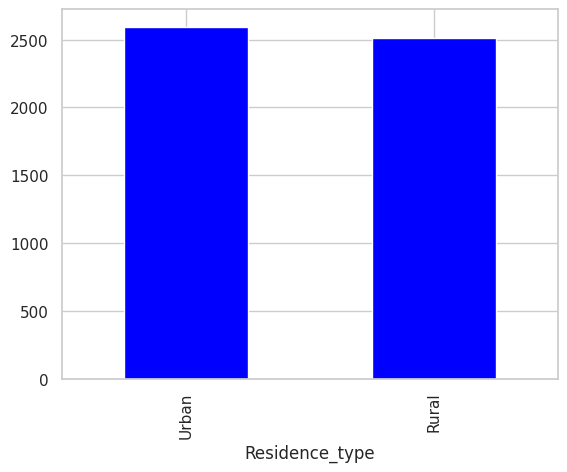

In [283]:

df['Residence_type'].value_counts().plot(kind="bar",color = "blue")

we have an equal percentage of population who are from Urban and rural areas

cross analysis

<Axes: xlabel='gender'>

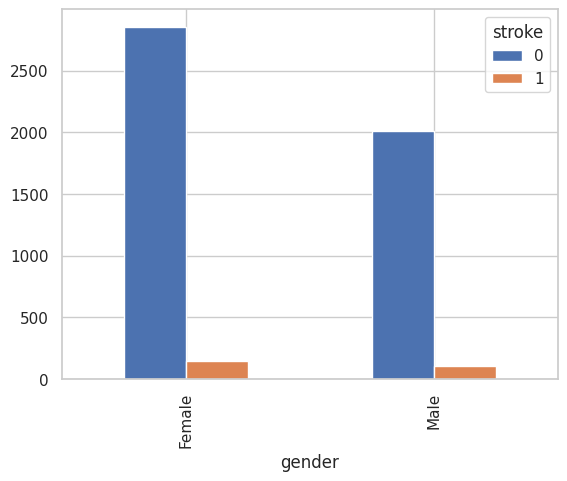

In [284]:

pd.crosstab(df['gender'],df['stroke']).plot.bar()

<Axes: xlabel='stroke', ylabel='count'>

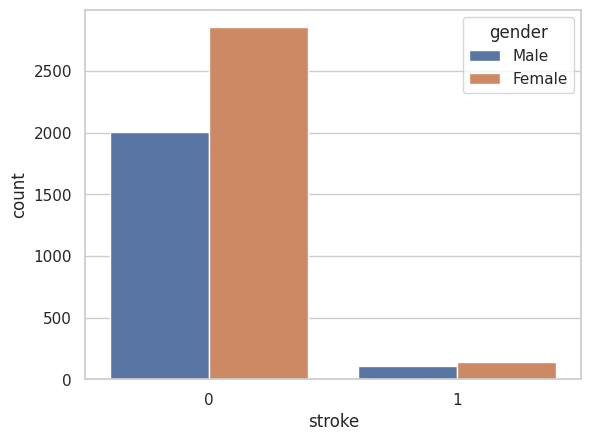

In [285]:
sns.countplot(x='stroke', hue='gender', data=df)


<Axes: xlabel='hypertension'>

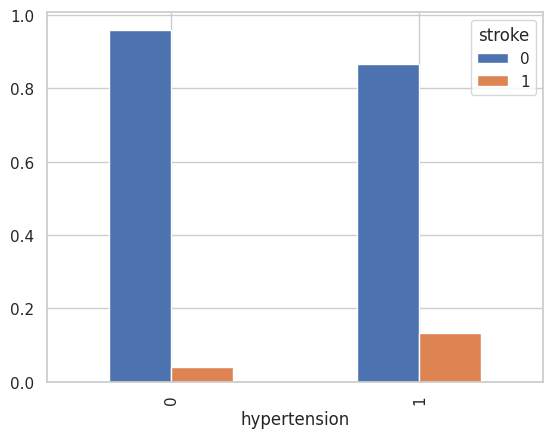

In [286]:
pd.crosstab(df['hypertension'],df['stroke'],normalize='index').plot.bar()


<Axes: xlabel='stroke', ylabel='count'>

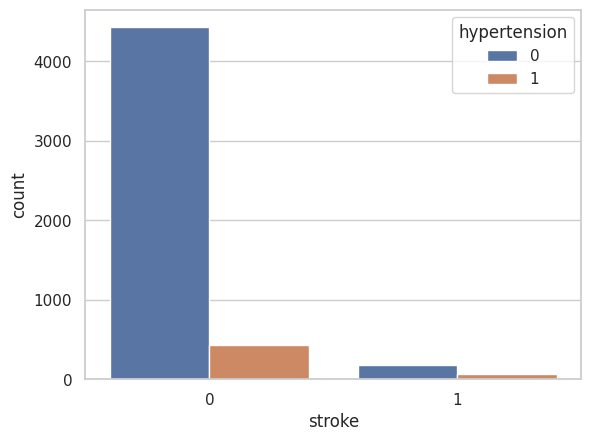

In [287]:
sns.countplot(x='stroke', hue='hypertension', data=df)


<Axes: xlabel='work_type'>

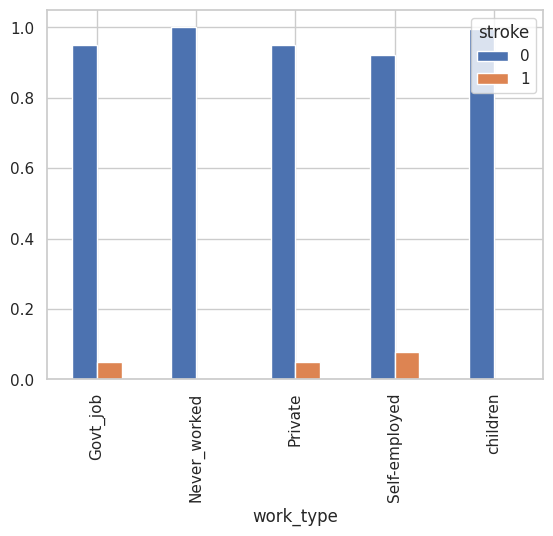

In [288]:
pd.crosstab(df['work_type'],df['stroke'],normalize='index').plot.bar()


<Axes: xlabel='stroke', ylabel='count'>

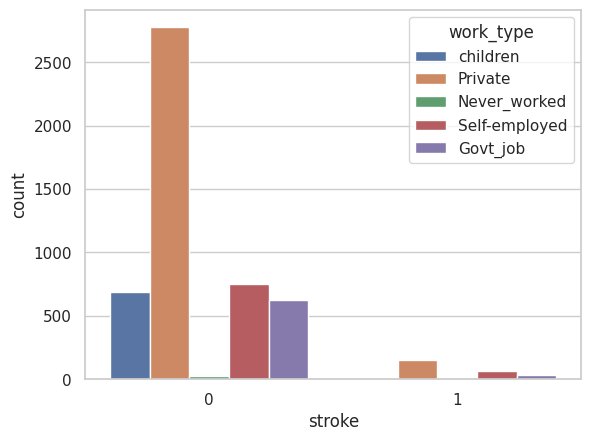

In [289]:
sns.countplot(x='stroke', hue='work_type', data=df)


Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='smoking_status'>

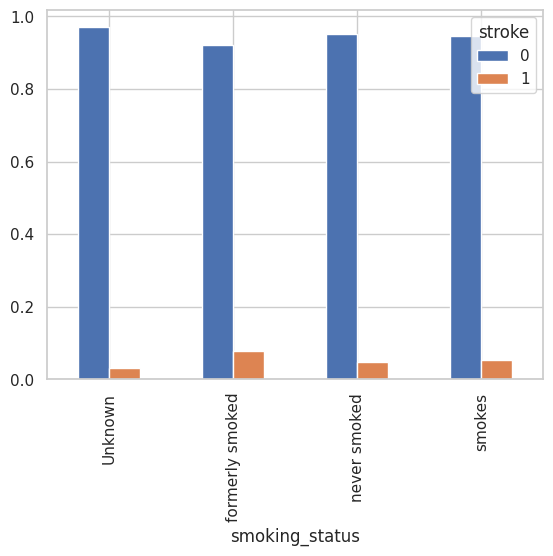

In [290]:
pd.crosstab(df['smoking_status'],df['stroke'],normalize='index').plot.bar()


<Axes: xlabel='stroke', ylabel='count'>

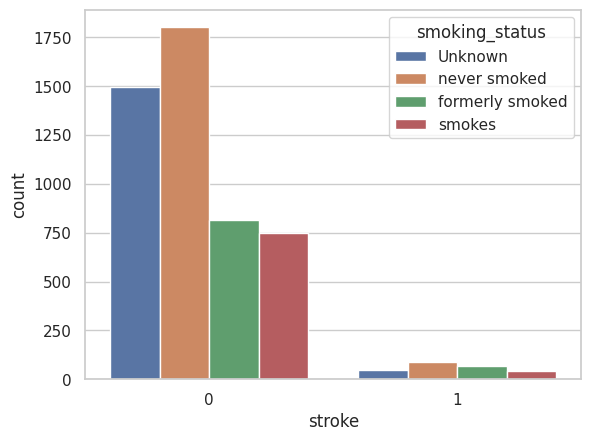

In [291]:
sns.countplot(x='stroke', hue='smoking_status', data=df)


Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='Residence_type'>

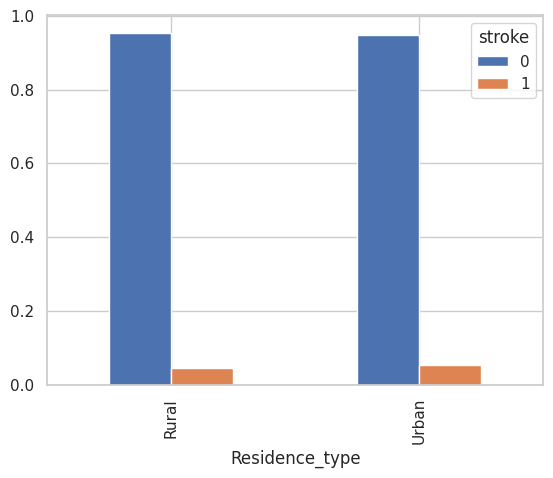

In [292]:
pd.crosstab(df['Residence_type'],df['stroke'],normalize='index').plot.bar()


<Axes: xlabel='stroke', ylabel='count'>

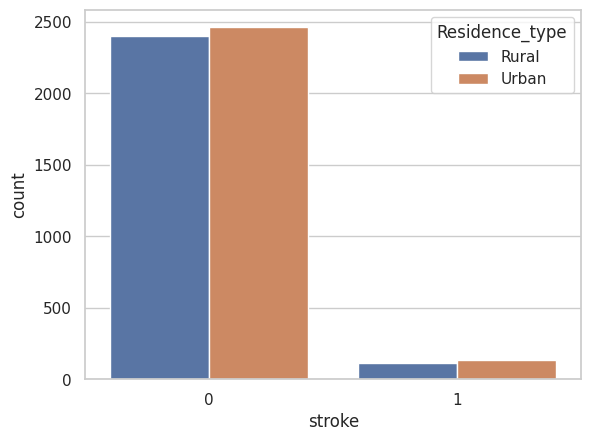

In [293]:
sns.countplot(x='stroke', hue='Residence_type', data=df)


Based on the analysis the people who live in Urban areas were reported with more strokes

Cross Analysis for Strokes and Heart Disease



<Axes: xlabel='heart_disease'>

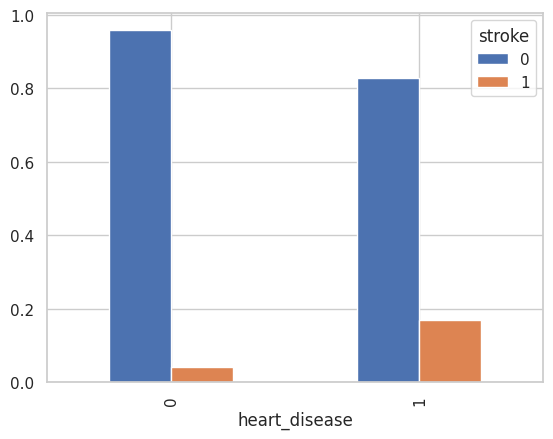

In [294]:
pd.crosstab(df['heart_disease'],df['stroke'],normalize='index').plot.bar()


<Axes: xlabel='stroke', ylabel='count'>

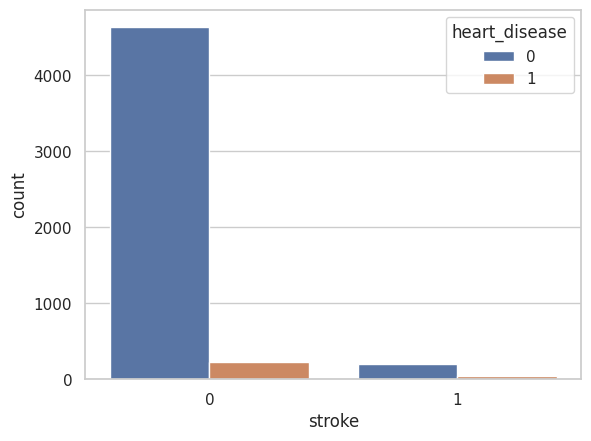

In [295]:
sns.countplot(x='stroke', hue='heart_disease', data=df)


This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

Cross Analysis for Strokes and Marriage Status



<Axes: xlabel='ever_married'>

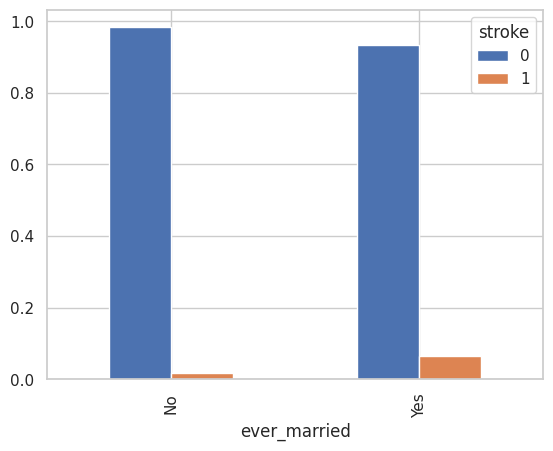

In [296]:
pd.crosstab(df['ever_married'],df['stroke'],normalize='index').plot.bar()


<Axes: xlabel='stroke', ylabel='count'>

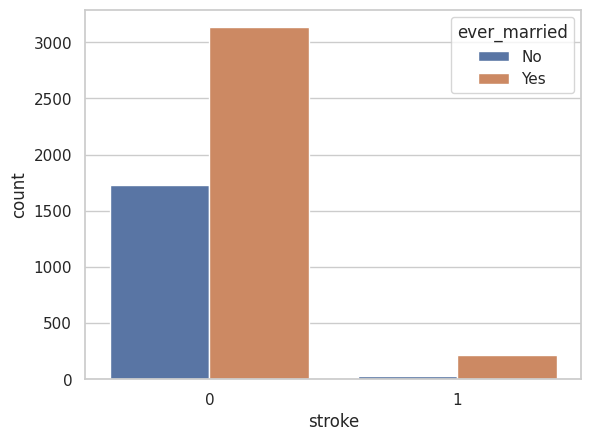

In [297]:
sns.countplot(x='stroke', hue='ever_married', data=df)


This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes". This shows most of the Married people got Strokes compared to Unmarried people.

# Visulizations


Distribution of Data by Age and Gender:

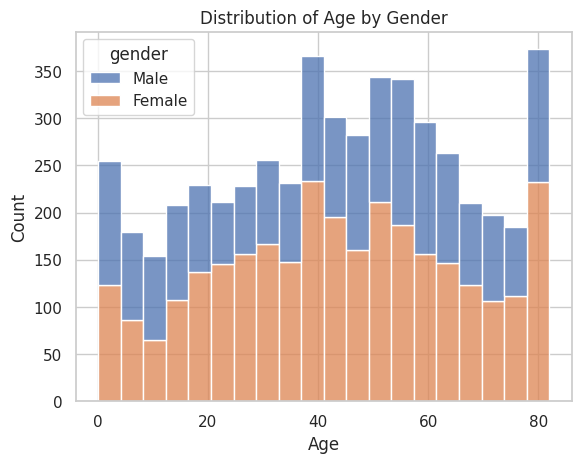

In [298]:
sns.histplot(data=df, x='age', hue='gender', multiple='stack')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Distribution of Patients Who Suffered from a Stroke According to Age:

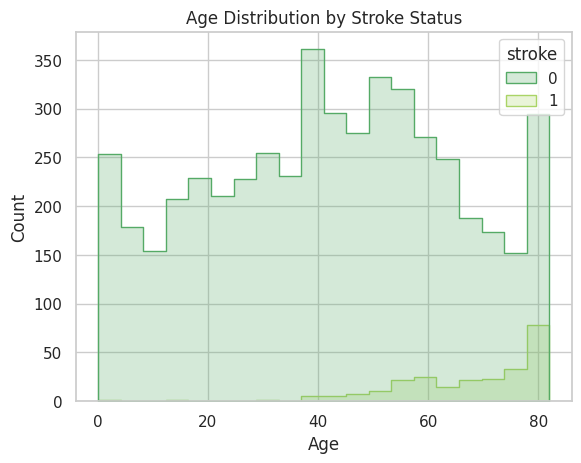

In [299]:
sns.histplot(data=df, x='age', hue='stroke', element='step', palette='summer')
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Distribution of Data Over Heart Disease and Hypertension Cases:

<ipython-input-300-21db9f2ae201>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='heart_disease', data=df, palette='autumn')
<ipython-input-300-21db9f2ae201>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='hypertension', data=df, palette='winter')


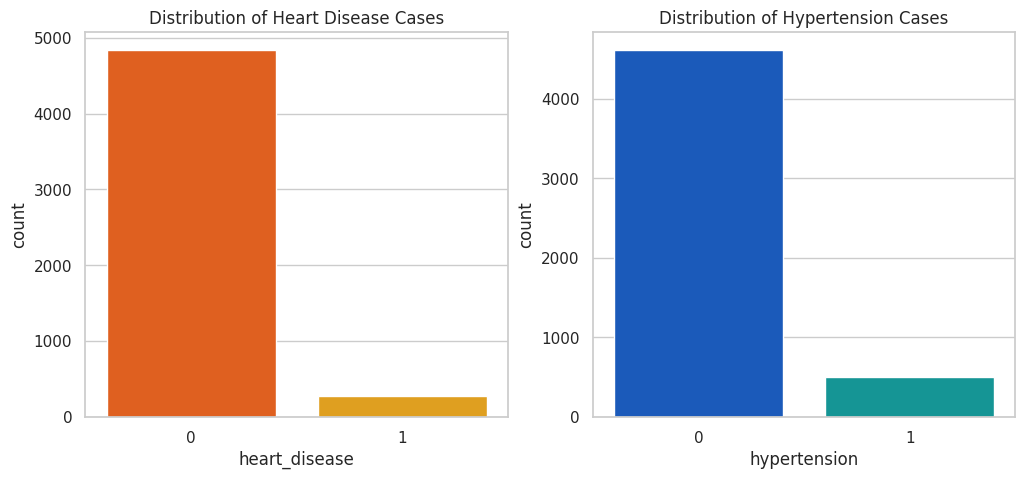

In [300]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(ax=axes[0], x='heart_disease', data=df, palette='autumn')
axes[0].set_title('Distribution of Heart Disease Cases')
sns.countplot(ax=axes[1], x='hypertension', data=df, palette='winter')
axes[1].set_title('Distribution of Hypertension Cases')
plt.show()


Distribution of Data According to BMI:


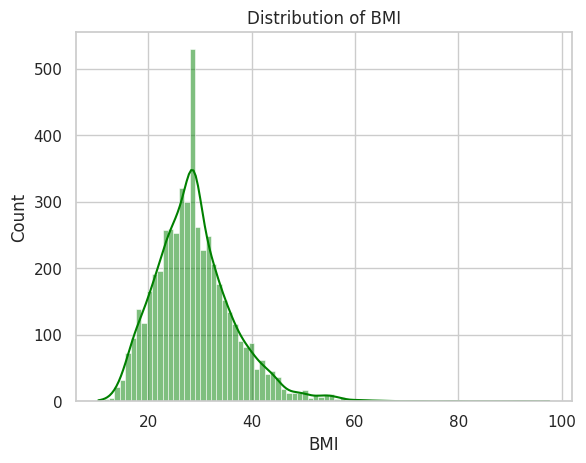

In [301]:
sns.histplot(data=df, x='bmi', kde=True, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


Distribution of Data According to Average Glucose Level:


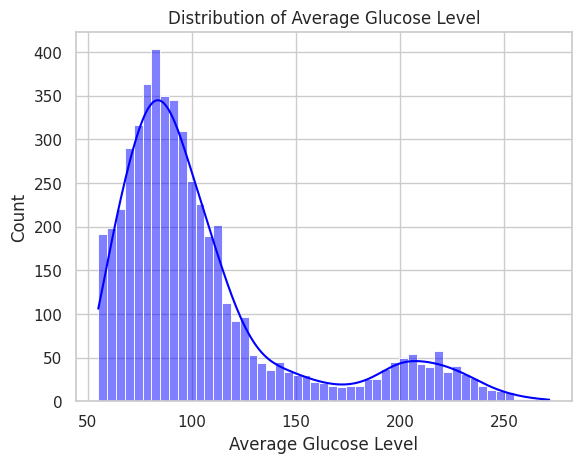

In [302]:
sns.histplot(data=df, x='avg_glucose_level', kde=True, color='blue')
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.show()


Distribution of Data According to Smoking Status and Relation to Stroke:


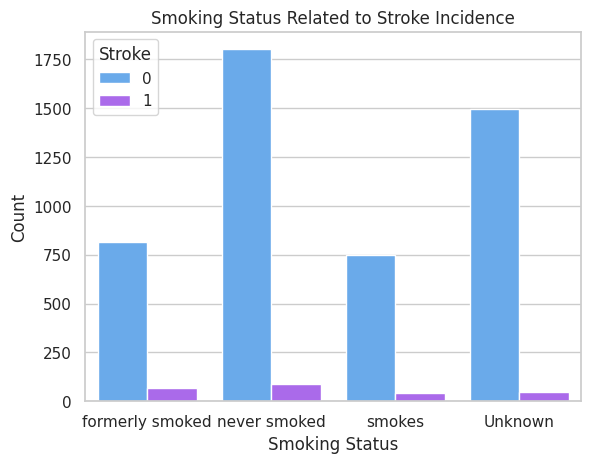

In [303]:
sns.countplot(x='smoking_status', hue='stroke', data=df, palette='cool')
plt.title('Smoking Status Related to Stroke Incidence')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()


Distribution of Data According to Work Type and Residency:


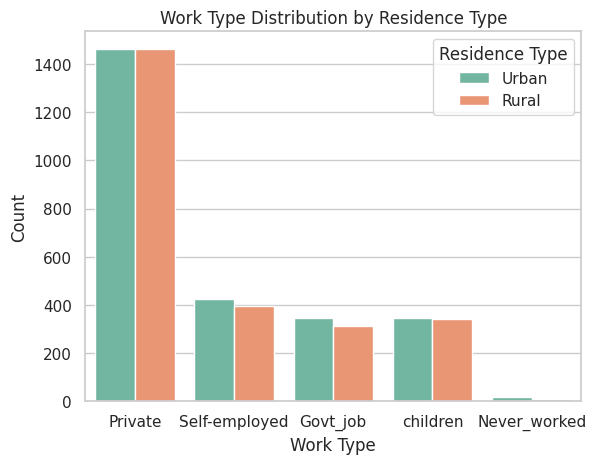

In [304]:
sns.countplot(x='work_type', hue='Residence_type', data=df, palette='Set2')
plt.title('Work Type Distribution by Residence Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Residence Type')
plt.show()


In [305]:
cats = list(df.select_dtypes(include=['object','bool']) )
nums = list(df.select_dtypes(include=['int64','float64']))
print(cats)
print(nums)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# classify data for the encoding
encoder = []
onehot = []

for col in cats:
   if len(df[col].unique()) == 2:
        encoder.append(col)
   else:
        onehot.append(col)

print(encoder)
print(onehot)


['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
['gender', 'ever_married', 'Residence_type']
['work_type', 'smoking_status']


In [306]:
df_labencoded = df.copy()

for col in encoder:
    df_labencoded[col] = df_labencoded[col].astype('category').cat.codes
df_labencoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


Remove outliers of the dataset

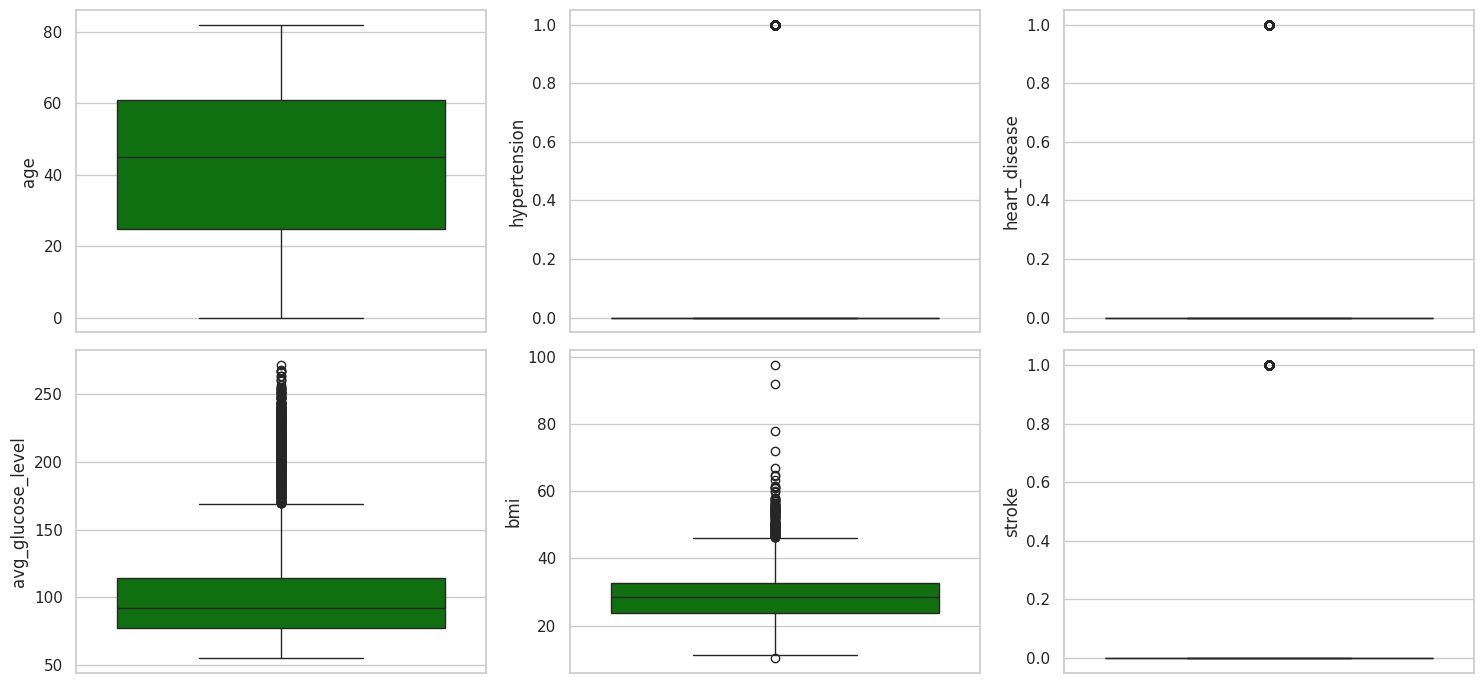

In [307]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()

In [308]:
outlier = ['avg_glucose_level', 'bmi']


In [309]:
Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[outlier]<(Q1-1.5*IQR))|(df[outlier]>(Q3+1.5*IQR))).any(axis=1)]
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
3,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
4,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4386,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
4387,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4388,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
4389,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [310]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Convert Categorical column to Numerical

In [313]:

# onehot encoding for categorical feature
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.500000,1,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
6,74.0,1,1,70.09,27.400000,1,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
7,69.0,0,0,94.39,22.800000,1,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
8,59.0,0,0,76.15,28.893237,1,True,False,False,True,...,False,True,False,False,True,False,True,False,False,False
9,78.0,0,0,58.57,24.200000,1,True,False,False,True,...,False,True,False,False,False,True,True,False,False,False


heatmap

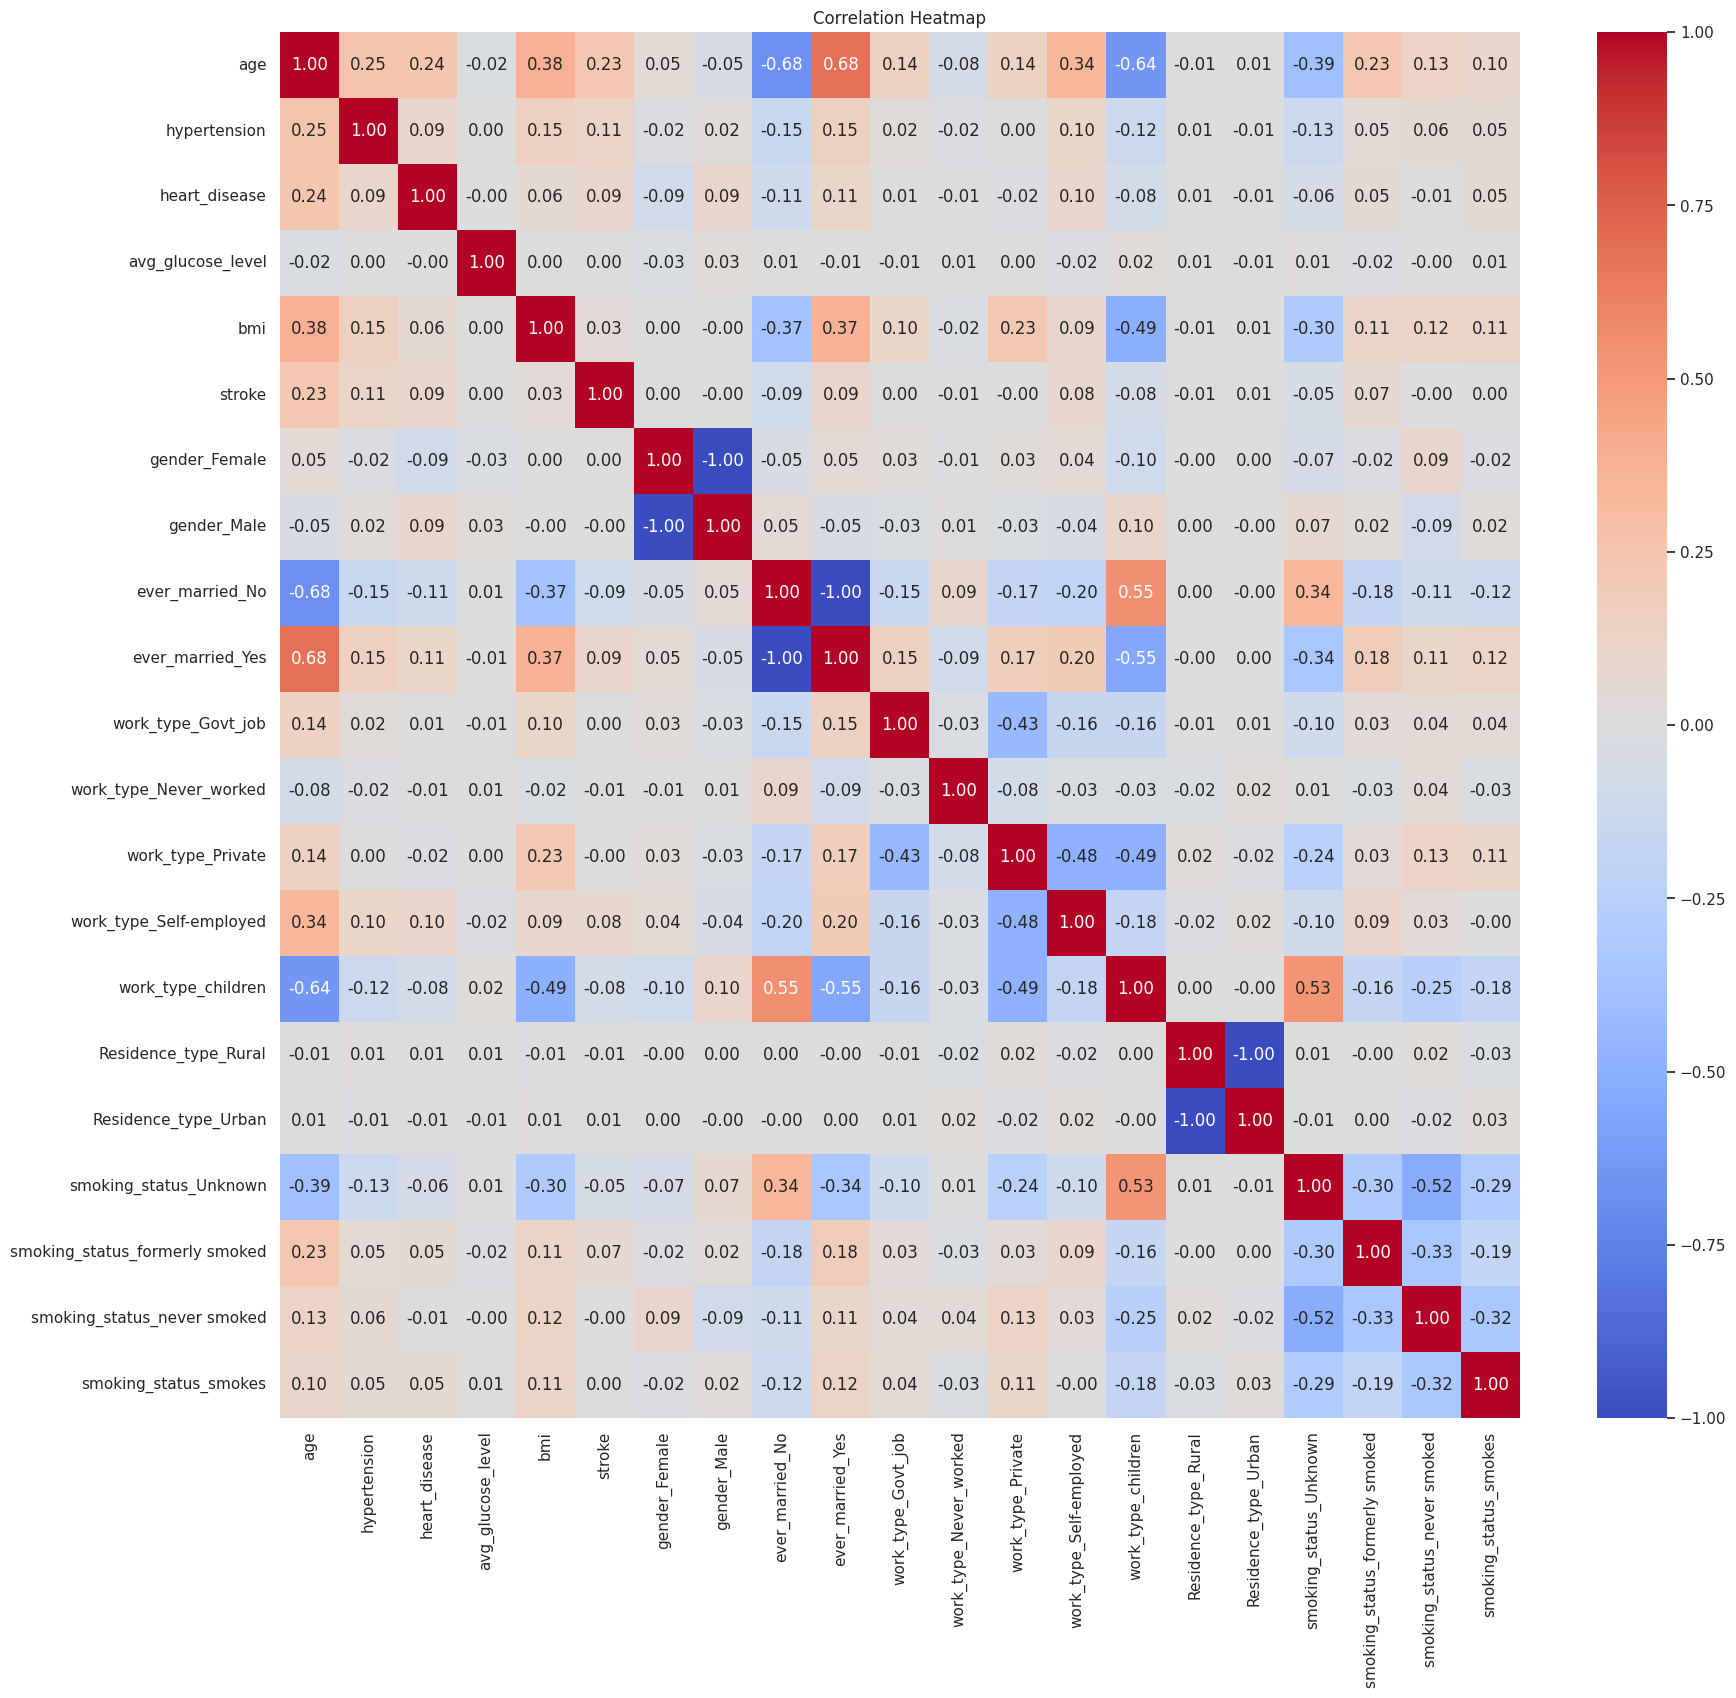

In [316]:
# Generate a correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Pre Modeling Steps


In [317]:

# separate feature and target
X = df.drop(columns = ['stroke'])
y = df['stroke']

<Axes: xlabel='stroke'>

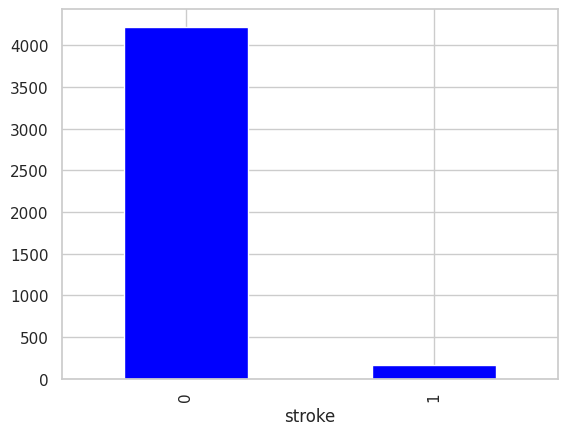

In [318]:
df['stroke'].value_counts().plot(kind="bar",color = "blue")

In [319]:
# using SMOTE Techniqe
sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')


Shape of X before SMOTE:(4391, 20)
Shape of X after SMOTE:(8452, 20) 


Target Class distributuion before SMOTE:
stroke
0    0.962423
1    0.037577
Name: proportion, dtype: float64
Target Class distributuion after SMOTE :
stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


Split train data and test data

In [320]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = .2,
    random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6761, 20), (6761,), (1691, 20), (1691,))

Normalize data with StandardScaler

In [321]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

Machine Learning Modeling

Using K-Nearest-Neighbors-Classifier

In [322]:
# Create simple model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [323]:
# Test model with test data
y_pred = knn.predict(X_test)

In [324]:
# Simple model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,knn.predict(X_train)))

knn_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(knn_report).transpose()

Testing-set Accuracy score is: 0.9716144293317563
Training-set Accuracy score is: 0.9788492826504955


,precision,recall,f1-score,support
No Stroke,0.957993,0.985594,0.971598,833.000000
Stroke,0.985612,0.958042,0.971631,858.000000
accuracy,0.971614,0.971614,0.971614,0.971614
macro avg,0.971802,0.971818,0.971614,1691.000000
weighted avg,0.972006,0.971614,0.971615,1691.000000


<Axes: >

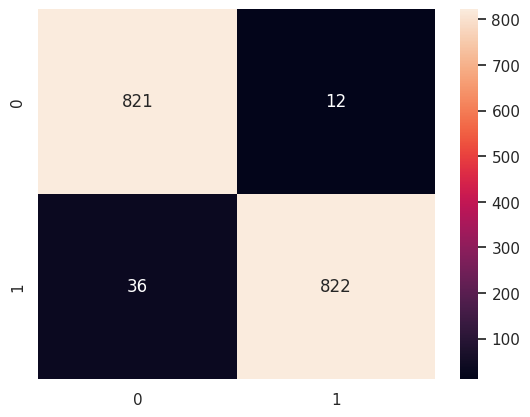

In [325]:
# Confussion matrix
knn_cf = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_cf, annot = True, fmt = "d")

**Decision** tree

In [327]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [328]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [329]:
# Predict on the test set
y_pred_dt = dt.predict(X_test)

In [330]:
dt_acc_test = accuracy_score(y_test, y_pred_dt)
dt_acc_test

0.9520993494973389

In [331]:
dt_acc_train = accuracy_score(y_train, dt.predict(X_train))
dt_acc_train

1.0

In [332]:
dt_report = classification_report(y_test, y_pred_dt, output_dict=True, target_names=['No Stroke', 'Stroke'])
dt_report

{'No Stroke': {'precision': 0.961916461916462,
  'recall': 0.9399759903961584,
  'f1-score': 0.9508196721311475,
  'support': 833},
 'Stroke': {'precision': 0.942987457240593,
  'recall': 0.9638694638694638,
  'f1-score': 0.953314121037464,
  'support': 858},
 'accuracy': 0.9520993494973389,
 'macro avg': {'precision': 0.9524519595785275,
  'recall': 0.9519227271328111,
  'f1-score': 0.9520668965843058,
  'support': 1691},
 'weighted avg': {'precision': 0.9523120349431351,
  'recall': 0.9520993494973389,
  'f1-score': 0.9520853357394383,
  'support': 1691}}

In [333]:
dt_report_df = pd.DataFrame(dt_report).transpose()
dt_report_df

,precision,recall,f1-score,support
No Stroke,0.961916,0.939976,0.950820,833.000000
Stroke,0.942987,0.963869,0.953314,858.000000
accuracy,0.952099,0.952099,0.952099,0.952099
macro avg,0.952452,0.951923,0.952067,1691.000000
weighted avg,0.952312,0.952099,0.952085,1691.000000


In [334]:
# Adjust the parameters to reduce overfitting
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [335]:

# Calculate and print the Testing-set and Training-set Accuracy
dt_acc_test = accuracy_score(y_test, y_pred_dt)
dt_acc_test


0.9160260201064458

In [336]:
dt_acc_train = accuracy_score(y_train, dt.predict(X_train))
dt_acc_train

0.9507469309273776

In [337]:
# Generate and display the classification report
dt_report = classification_report(y_test, y_pred_dt, output_dict=True, target_names=['No Stroke', 'Stroke'])
dt_report_df = pd.DataFrame(dt_report).transpose()
dt_report_df


,precision,recall,f1-score,support
No Stroke,0.911800,0.918367,0.915072,833.000000
Stroke,0.920188,0.913753,0.916959,858.000000
accuracy,0.916026,0.916026,0.916026,0.916026
macro avg,0.915994,0.916060,0.916015,1691.000000
weighted avg,0.916056,0.916026,0.916029,1691.000000


In [338]:
print('Decision Tree Testing-set Accuracy:', dt_acc_test)
print('Decision Tree Training-set Accuracy:', dt_acc_train)
print(dt_report_df)

Decision Tree Testing-set Accuracy: 0.9160260201064458
Decision Tree Training-set Accuracy: 0.9507469309273776
              precision    recall  f1-score      support
No Stroke      0.911800  0.918367  0.915072   833.000000
Stroke         0.920188  0.913753  0.916959   858.000000
accuracy       0.916026  0.916026  0.916026     0.916026
macro avg      0.915994  0.916060  0.916015  1691.000000
weighted avg   0.916056  0.916026  0.916029  1691.000000


Random forest

In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [340]:
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [341]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

In [342]:
rf_acc_test = accuracy_score(y_test, y_pred_rf)
rf_acc_test

0.9816676522767593

In [343]:
rf_acc_train = accuracy_score(y_train, rf.predict(X_train))
rf_acc_train

1.0

cross validation


In [344]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)  # 'cv=5' specifies the number of folds in a (Stratified)KFold


In [345]:

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of the cross-validation scores:", cv_scores.std())


Cross-validation scores: [0.96245734 0.96127563 0.96355353 0.96127563 0.96241458]
Mean cross-validation score: 0.9621953400141494
Standard deviation of the cross-validation scores: 0.0008547674177761767


Svm

In [346]:
from sklearn.svm import SVC


In [347]:
# Create and train the SVM model
svm = SVC(kernel='linear', random_state=42)  # kernel can be changed to 'rbf', 'poly', etc.
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [348]:
# Predict on the test set
y_pred_svm = svm.predict(X_test)

In [349]:
# Calculate and print the Testing-set and Training-set Accuracy
print('Testing-set Accuracy score for SVM is:', accuracy_score(y_test, y_pred_svm))
print('Training-set Accuracy score for SVM is:', accuracy_score(y_train, svm.predict(X_train)))


Testing-set Accuracy score for SVM is: 0.9639266706091071
Training-set Accuracy score for SVM is: 0.9701227629048957


In [350]:
# Generate and display the classification report
svm_report = classification_report(y_test, y_pred_svm, output_dict=True, target_names=['No Stroke', 'Stroke'])
svm_report_df = pd.DataFrame(svm_report).transpose()
print(svm_report_df)

              precision    recall  f1-score      support
No Stroke      0.931767  1.000000  0.964679   833.000000
Stroke         1.000000  0.928904  0.963142   858.000000
accuracy       0.963927  0.963927  0.963927     0.963927
macro avg      0.965884  0.964452  0.963910  1691.000000
weighted avg   0.966388  0.963927  0.963899  1691.000000


In [351]:

# Create and train the SVM model with regularization
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')  # Example regularization parameters
svm_model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate and print the Testing-set and Training-set Accuracy
print('Testing-set Accuracy score for SVM is:', accuracy_score(y_test, y_pred_svm))
print('Training-set Accuracy score for SVM is:', accuracy_score(y_train, svm_model.predict(X_train)))

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of the cross-validation scores:", cv_scores.std())

Testing-set Accuracy score for SVM is: 0.9657007687758723
Training-set Accuracy score for SVM is: 0.9718976482768821
Cross-validation scores: [0.96245734 0.96241458 0.96241458 0.96241458 0.96241458]
Mean cross-validation score: 0.9624231304469513
Standard deviation of the cross-validation scores: 1.710371850389691e-05


Gradient Boosting Classifier

In [352]:
from sklearn.ensemble import GradientBoostingClassifier

In [353]:
# Create and train the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [354]:
# Predict on the test set
y_pred_gb = gb.predict(X_test)


In [355]:
# Calculate and print the Testing-set and Training-set Accuracy
print('Testing-set Accuracy score for Gradient Boosting is:', accuracy_score(y_test, y_pred_gb))
print('Training-set Accuracy score for Gradient Boosting is:', accuracy_score(y_train, gb.predict(X_train)))


Testing-set Accuracy score for Gradient Boosting is: 0.9686575990538143
Training-set Accuracy score for Gradient Boosting is: 0.9733767194202041


cross validation


In [356]:
# Perform cross-validation
cv_scores = cross_val_score(gb, X, y, cv=5)


In [357]:
# Predict on the test set
y_pred_gb = gb.predict(X_test)

In [358]:

# Calculate and print the Testing-set and Training-set Accuracy
print('Testing-set Accuracy score for Gradient Boosting is:', accuracy_score(y_test, y_pred_gb))
print('Training-set Accuracy score for Gradient Boosting is:', accuracy_score(y_train, gb.predict(X_train)))


Testing-set Accuracy score for Gradient Boosting is: 0.9686575990538143
Training-set Accuracy score for Gradient Boosting is: 0.9733767194202041


In [359]:

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of the cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.96131968 0.95671982 0.96013667 0.96583144 0.96013667]
Mean cross-validation score: 0.9608288565645886
Standard deviation of the cross-validation scores: 0.00293629471938756


In [360]:
# Generate and display the classification report
gb_report = classification_report(y_test, y_pred_gb, output_dict=True, target_names=['No Stroke', 'Stroke'])
gb_report_df = pd.DataFrame(gb_report).transpose()
print(gb_report_df)

              precision    recall  f1-score      support
No Stroke      0.946224  0.992797  0.968951   833.000000
Stroke         0.992656  0.945221  0.968358   858.000000
accuracy       0.968658  0.968658  0.968658     0.968658
macro avg      0.969440  0.969009  0.968655  1691.000000
weighted avg   0.969783  0.968658  0.968650  1691.000000


In [361]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to hold metrics for each model
model_metrics = {
    'Model': ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

models = [dt, rf, svm, knn, gb]
y_preds = [y_pred_dt, y_pred_rf, y_pred_svm, y_pred_knn, y_pred_gb]

# Calculate metrics for each model
for model, y_pred in zip(models, y_preds):
    model_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    model_metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    model_metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))


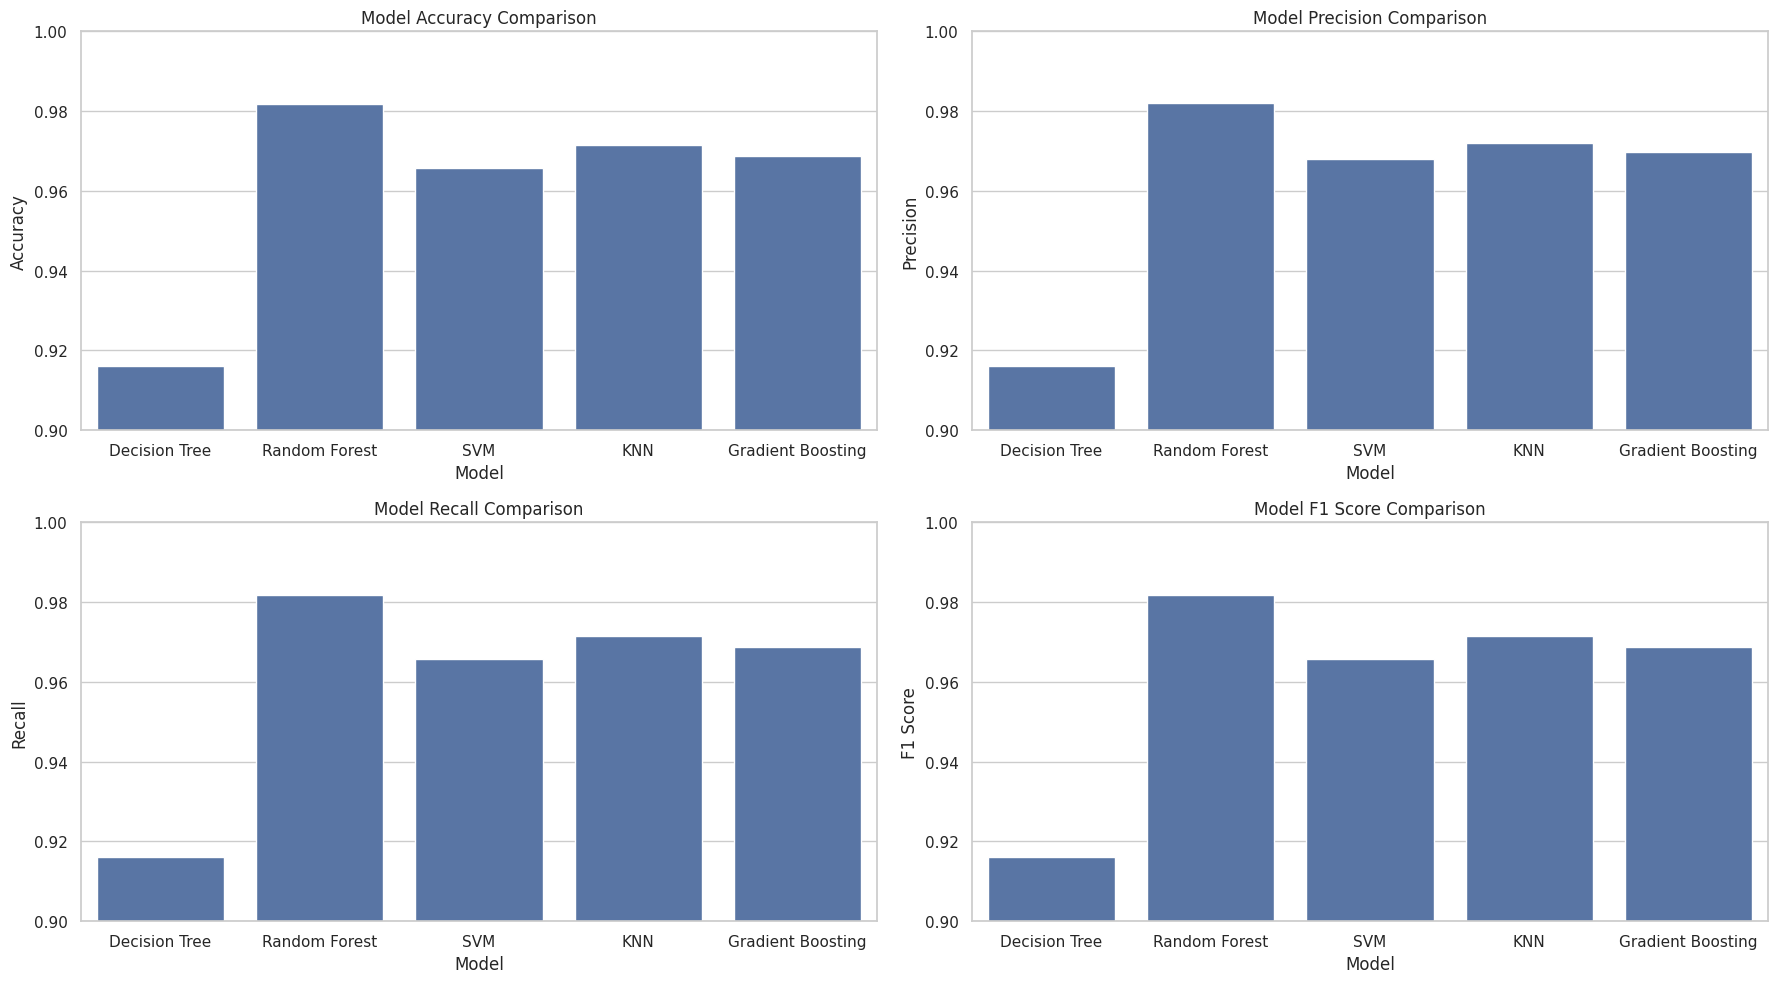

In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert metrics dictionary into DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
plt.figure(figsize=(18, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1)  # Adjust based on your data

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=metrics_df)
plt.title('Model Precision Comparison')
plt.ylim(0.9, 1)  # Adjust based on your data

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=metrics_df)
plt.title('Model Recall Comparison')
plt.ylim(0.9, 1)  # Adjust based on your data

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=metrics_df)
plt.title('Model F1 Score Comparison')
plt.ylim(0.9, 1)  # Adjust based on your data

# Show the plot
plt.tight_layout()
plt.show()
